In [14]:
import seaborn as sns
import matplotlib as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline


In [15]:
df = sns.load_dataset('iris')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


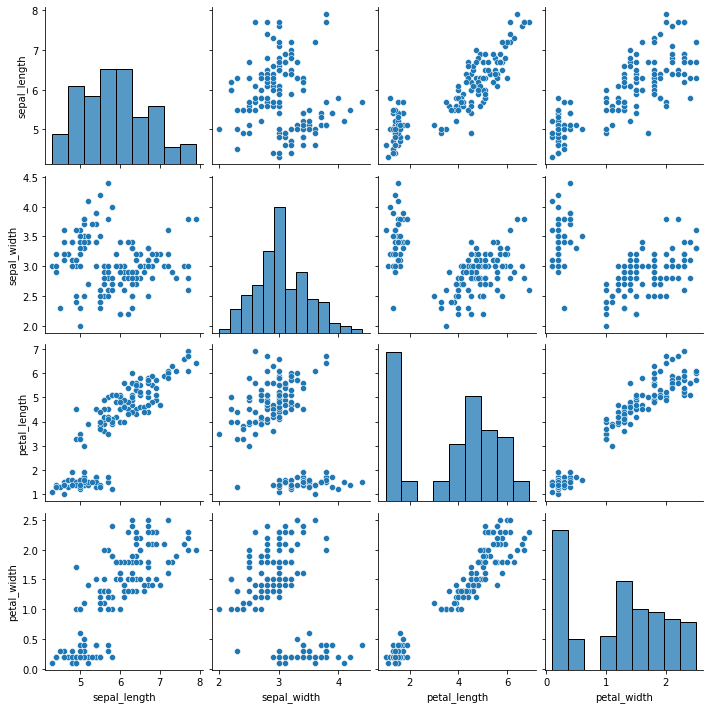

In [16]:
sns.pairplot(df)

In [18]:
train, test = train_test_split(df, test_size=0.2)
train

,sepal_length,sepal_width,petal_length,petal_width,species
17,5.1,3.5,1.4,0.3,setosa
0,5.1,3.5,1.4,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
116,6.5,3.0,5.5,1.8,virginica
...,...,...,...,...,...
125,7.2,3.2,6.0,1.8,virginica
4,5.0,3.6,1.4,0.2,setosa
81,5.5,2.4,3.7,1.0,versicolor
120,6.9,3.2,5.7,2.3,virginica


In [23]:
x = train['petal_length']
y = train['petal_width']

x_mean = x.mean()
y_mean = y.mean()
x_mean,y_mean

x.shape,y.shape

((120,), (120,))

In [24]:
y

17     0.3
0      0.2
42     0.2
27     0.2
116    1.8
      ... 
125    1.8
4      0.2
81     1.0
120    2.3
146    1.9
Name: petal_width, Length: 120, dtype: float64

In [25]:
s = 0
s2 = 0

y_arr = y.array
for i,x_i in enumerate(x):
    s += (x_i-x_mean)*(y_arr[i] - y_mean)
    s2 += (x_i -x_mean)*(x_i -x_mean)
A  = s/s2
A

0.40893898647107

In [26]:
B = y_mean - A*x_mean
B

-0.35068877252187813

In [30]:
pred = []
for i,x_i in enumerate(test['petal_length']):
    pred += [A*x_i + B]

test = test.reset_index()
test['pred'] = pd.Series(pred)
test.head(10)


,index,sepal_length,sepal_width,petal_length,petal_width,species,pred
0,90,5.5,2.6,4.4,1.2,versicolor,1.448643
1,19,5.1,3.8,1.5,0.3,setosa,0.262720
2,1,4.9,3.0,1.4,0.2,setosa,0.221826
3,63,6.1,2.9,4.7,1.4,versicolor,1.571324
4,103,6.3,2.9,5.6,1.8,virginica,1.939370
5,112,6.8,3.0,5.5,2.1,virginica,1.898476
6,40,5.0,3.5,1.3,0.3,setosa,0.180932
7,144,6.7,3.3,5.7,2.5,virginica,1.980263
8,119,6.0,2.2,5.0,1.5,virginica,1.694006
9,85,6.0,3.4,4.5,1.6,versicolor,1.489537


C:\Users\jotit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

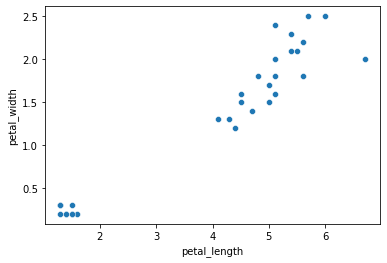

In [31]:
sns.scatterplot(test['petal_length'],test['petal_width'])

C:\Users\jotit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jotit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

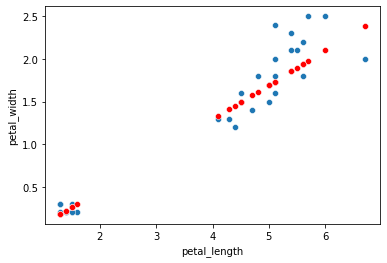

In [32]:
sns.scatterplot(test['petal_length'],test['petal_width'])
sns.scatterplot(test['petal_length'],test['pred'],color='red')

In [35]:
from sklearn.linear_model import LinearRegression
X = x.values.reshape(-1,1)
reg = LinearRegression().fit(X, y)

In [36]:
reg.coef_

array([0.40893899])

In [39]:
pred_sklearn = reg.predict(test['petal_length'].values.reshape(-1,1))
test['pred_sklearn'] = pred_sklearn

In [40]:
test

,index,sepal_length,sepal_width,petal_length,petal_width,species,pred,pred_sklearn
0,90,5.5,2.6,4.4,1.2,versicolor,1.448643,1.448643
1,19,5.1,3.8,1.5,0.3,setosa,0.262720,0.262720
2,1,4.9,3.0,1.4,0.2,setosa,0.221826,0.221826
3,63,6.1,2.9,4.7,1.4,versicolor,1.571324,1.571324
4,103,6.3,2.9,5.6,1.8,virginica,1.939370,1.939370
5,112,6.8,3.0,5.5,2.1,virginica,1.898476,1.898476
6,40,5.0,3.5,1.3,0.3,setosa,0.180932,0.180932
7,144,6.7,3.3,5.7,2.5,virginica,1.980263,1.980263
8,119,6.0,2.2,5.0,1.5,virginica,1.694006,1.694006
9,85,6.0,3.4,4.5,1.6,versicolor,1.489537,1.489537


C:\Users\jotit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jotit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jotit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

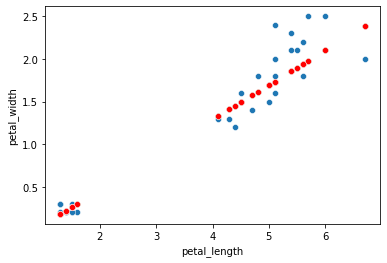

In [43]:
sns.scatterplot(test['petal_length'],test['petal_width'])
sns.scatterplot(test['petal_length'],test['pred_sklearn'],color='green')
sns.scatterplot(test['petal_length'],test['pred'],color='red')
